In [1]:
# Importing neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
resumes = pd.read_csv('resumes.csv')

In [3]:
resumes.shape

(2484, 5)

In [4]:
resumes.head()

ID                                         resume_str  \
0  10554236  ACCOUNTANT\nSummary\nFinancial Accountant spec...   
1  10674770  STAFF ACCOUNTANT\nSummary\nHighly analytical a...   
2  11163645  ACCOUNTANT\nProfessional Summary\nTo obtain a ...   
3  11759079  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...   
4  12065211  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...   

                                              Skills  \
0  Accounting; General Accounting; Accounts Payab...   
1  accounting, accounts payable, Accounts Receiva...   
2  accounts payables, accounts receivables, Accou...   
3  accounting, balance sheet, budgets, client, cl...   
4  Aderant/CMS\nExcel\nQuickBooks Pro\nSQL\nAcces...   

                                           Education    Category  
0  Northern Maine Community College\n \n1994\n \n...  ACCOUNTANT  
1  Bachelor of Science\n \n: \nAccounting\n \n, \...  ACCOUNTANT  
2  Computer Applications Specialist Certificate P...  ACCOUNTANT  
3  EMORY UNIVERSITY, Goizueta Business School\n \...  ACCOUNTANT  
4  Bachelor of Business Administration\n \n: \nAc...  ACCOUNTANT

In [5]:
resumes.tail()

ID                                         resume_str  \
2479  86322251  READING TEACHER\nSummary\nI am a highly motiva...   
2480  86597425  HISTORY TEACHER\nProfessional Summary\nTo be e...   
2481  90363254  TEACHER\nSummary\nHighly ethical, dependable, ...   
2482  96547039  TEACHER\nSummary\nTalented early education pro...   
2483  99244405  Kpandipou Koffi\nSummary\nCompassionate teachi...   

                                                 Skills  \
2479  Highly Effective TeacherÂ \nMotivator\nInnovat...   
2480  [Number]\n \nWPM typing speed\nProfessional ph...   
2481  conflict resolution, course development, criti...   
2482  CPR, Creative thinking, delivery, First Aid, p...   
2483  Superb communication both verbal and written.\...   

                                              Education Category  
2479  University of South Florida\n \n2002\n \nBache...  TEACHER  
2480  Bachelor of Science\n \n: \nInterdisciplinary ...  TEACHER  
2481  University of Phoenix,\n \n2007\n \nMaster of ...  TEACHER  
2482  Conflict resolution techniques\nTraining in fo...  TEACHER  
2483  and Training\nMBA\n \n: \nMarketing\n \nIGloba...  TEACHER

In [6]:
resumes.sample (5)

ID                                         resume_str  \
1312  26790545  PRESENTATION DESIGNER\nSummary\nCustomer Servi...   
523   28790806  DATASTAGE ETL DEVELOPER\nSummary\nI have 6 yea...   
938   18036030  Ashanique Gray\nSummary\nDiligently coordinate...   
2223  26130673  PUBLIC RELATIONS INTERN\nSummary\nAmbitious, s...   
1189  25213006  CONSULTANT\nSummary\nProfessional, dedicated h...   

                                                 Skills  \
1312  Adobe Creative Suite, Adobe Dreamweaver, Adobe...   
523   Expertise in IBM Datastage (8.5,9.1 and 11.5 v...   
938   Mental health assessments\nBehavior modificati...   
2223  Strong work ethic\nSelf-motivated\nData analys...   
1189                                                NaN   

                                              Education          Category  
1312  Bachelor of Science\n \n: \nComputer Science\n...          DESIGNER  
523   and Training\nBACHELOR OF TECHNOLOGY\n \n2011\...        AUTOMOBILE  
938   and Training\nHigh School Diploma\n \nChesapea...              CHEF  
2223  and Training\nBachelor of Arts\n \n: \nCommuni...  PUBLIC-RELATIONS  
1189  High School Diploma\n \n: \nGeneral Education\...        CONSULTANT

In [7]:
# Data Cleaning
# EDA
# Text Preprocessing

## 1. Data Cleaning

In [8]:
resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   resume_str  2483 non-null   object
 2   Skills      2396 non-null   object
 3   Education   2459 non-null   object
 4   Category    2484 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.2+ KB


In [9]:
# checking for missing values in the resumes dataset
resumes.isnull().sum()

ID             0
resume_str     1
Skills        88
Education     25
Category       0
dtype: int64

In [10]:
# In resume_str we have one missing values,Which comes to be a blank resume so we can drop that ro

In [11]:
resumes.duplicated().sum()

0

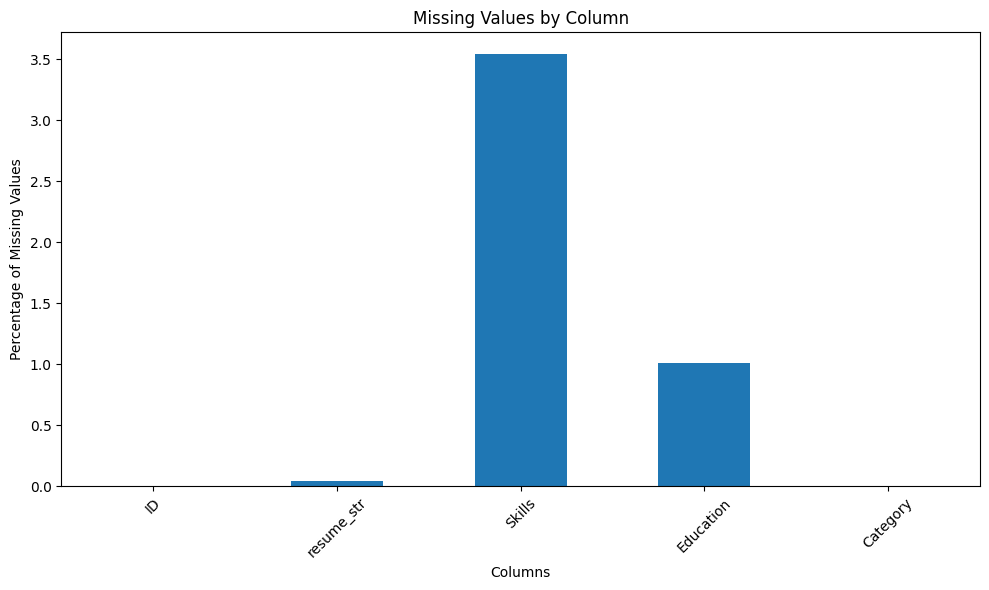

In [12]:
## Visualizing the missing values through bar plot in each feature

# Calculating the percentage of missing values in each column
missing_percentage = (resumes.isnull().sum() / len(resumes)) * 100

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind="bar")
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


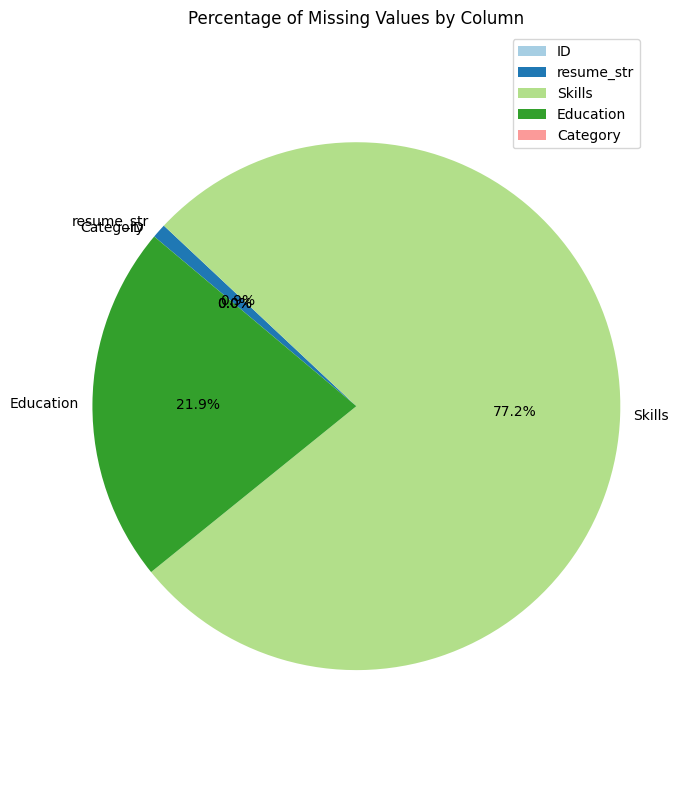

In [13]:
missing_percentage = (resumes.isnull().sum() / len(resumes)) * 100

# Create a pie chart with a legend
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(missing_percentage))
                       )  # Generate distinct colors
plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%',
        startangle=140, colors=colors, counterclock=False, labeldistance=1.05)

# Add a legend
plt.legend(missing_percentage.index, loc="best", bbox_to_anchor=(1, 1))

plt.title("Percentage of Missing Values by Column")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [14]:
# dropping the resume_str missing row
resumes.dropna(subset=["resume_str"], inplace=True)


In [17]:
# As we know that people who dont have education but have good skills in the resume
# And people who dont have some skills but have strong education background so i decided to keep them and not to remove them.

# Conditional imputation for Skills and Education
resumes.loc[resumes["Skills"].isnull() & ~resumes["Education"].isnull(),
       "Skills"] = "No skills provided"
resumes.loc[~resumes["Skills"].isnull() & resumes["Education"].isnull(),
       "Education"] = "No education provided"


In [18]:
resumes.isnull().sum()


ID            0
resume_str    0
Skills        4
Education     4
Category      0
dtype: int64

In [19]:
skill = resumes.loc[resumes['Skills'].isnull()]
skill


ID                                         resume_str Skills  \
1332  36269672  FLORAL DESIGNER\nSummary\nI have been involved...    NaN   
1480  16911115  BIOMEDICAL ENGINEERING TECHNICIAN II\nProfessi...    NaN   
1492  20566550  ENGINEERING INTERN\nPersonal Summary\nAge -22 ...    NaN   
2293  17410700  SALES ASSOCIATE\nProfessional Summary\nSales p...    NaN   

     Education     Category  
1332       NaN     DESIGNER  
1480       NaN  ENGINEERING  
1492       NaN  ENGINEERING  
2293       NaN        SALES

In [20]:
# Removing these null values from the dataset
# As keeping in mind Education is important , while applying for a job 
# so remove the null values in the education and skills
resumes.dropna(subset=['Skills','Education'],inplace = True)

In [21]:
resumes.isnull().sum()

ID            0
resume_str    0
Skills        0
Education     0
Category      0
dtype: int64

In [22]:
# Removing duplicates
# There are is no duplicate data presnt

## 2.Performing EDA

In [23]:
# Exploring Categories
resumes['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
CHEF                      118
FITNESS                   117
AVIATION                  117
ENGINEERING               116
SALES                     115
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  106
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

## Visualizing the distribution of Categories

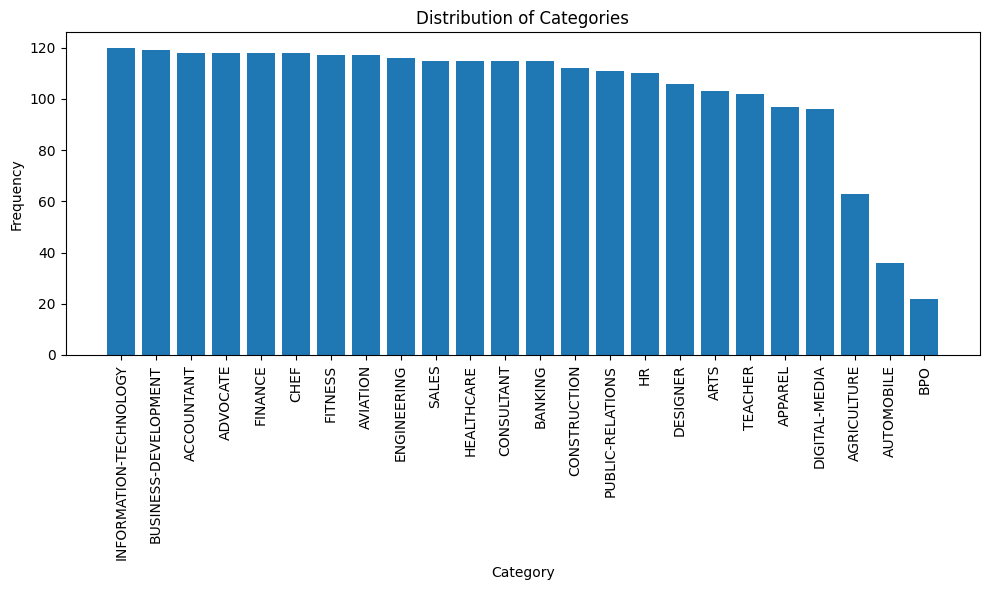

In [24]:

category_counts = resumes["Category"].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Distribution of Categories")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
resumes['Category'].unique()

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

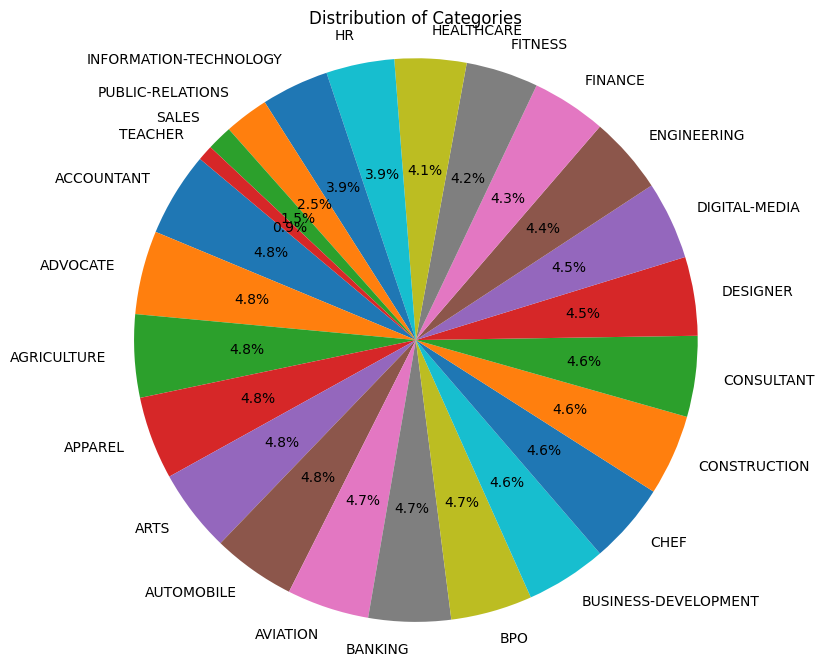

In [26]:
# Visualizing through piechart
counts = resumes['Category'].value_counts()
labels = resumes['Category'].unique()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Categories")
plt.axis('equal')
plt.show()


In [27]:
resumes['resume_str'][0]

'ACCOUNTANT\nSummary\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\nHighlights\nAccount reconciliations\nResults-oriented\nFinancial reporting\nCritical thinking\nAccounting operations professional\nAnalysis of financial systems\nERP (Enterprise Resource Planning) software.\nExcellent facilitator\nAccomplishments\nServed on a tiger team which identified and resolved General Ledger postings in DEAMS totaling $360B in accounting adjustments. This allowed\nfor the first successful fiscal year-end close for 2012.\nIn collaboration with DFAS Europe, developed an automated tool that identified duplicate obligations. This tool allowed HQ USAFE to\ndeobligate over $5M in duplicate obligations.\nExperience\nCompany Name\n \nJuly 2011\n \nto \nNovember 2012\n \nAccountant\n \nCity\n \n, \nState\nEnterprise Resource Planning Office (ERO)\nIn this position as an Accountant assigned to the Defense Enterprise Accounting and Managem

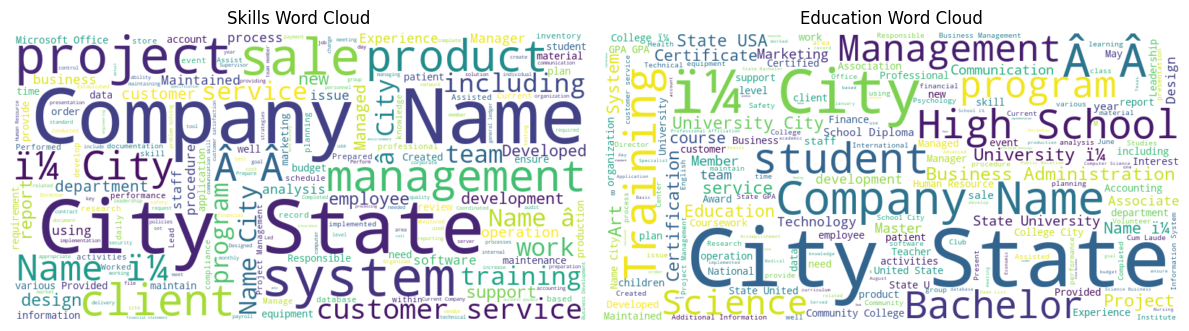

In [28]:
from wordcloud import WordCloud



# Concatenate all "Skills" and "Education" text
all_skills_text = ' '.join(resumes['Skills'].astype(str))
all_education_text = ' '.join(resumes['Education'].astype(str))

# Create word clouds for "Skills"
skills_wordcloud = WordCloud(
    width=800, height=400, background_color='white').generate(all_skills_text)

# Create word clouds for "Education"
education_wordcloud = WordCloud(
    width=800, height=400, background_color='white').generate(all_education_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(skills_wordcloud, interpolation='bilinear')
plt.title('Skills Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(education_wordcloud, interpolation='bilinear')
plt.title('Education Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'CV length')

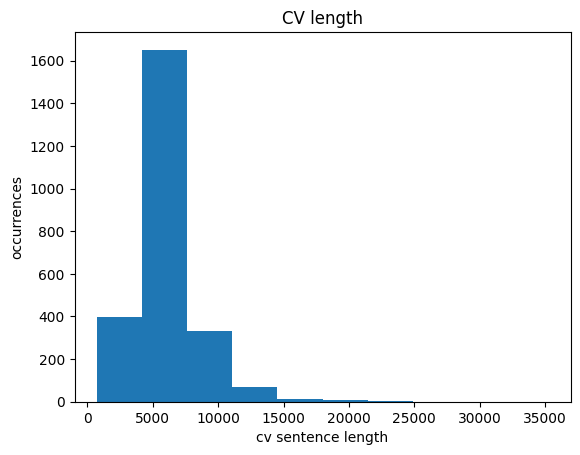

In [29]:
# EDA on CV contennt

cv_length=[len(i) for i in resumes['resume_str']]
plt.hist(cv_length)
plt.xlabel('cv sentence length')
plt.ylabel('occurrences')
plt.title('CV length')


# word cloud for visualizing skills in a specified category

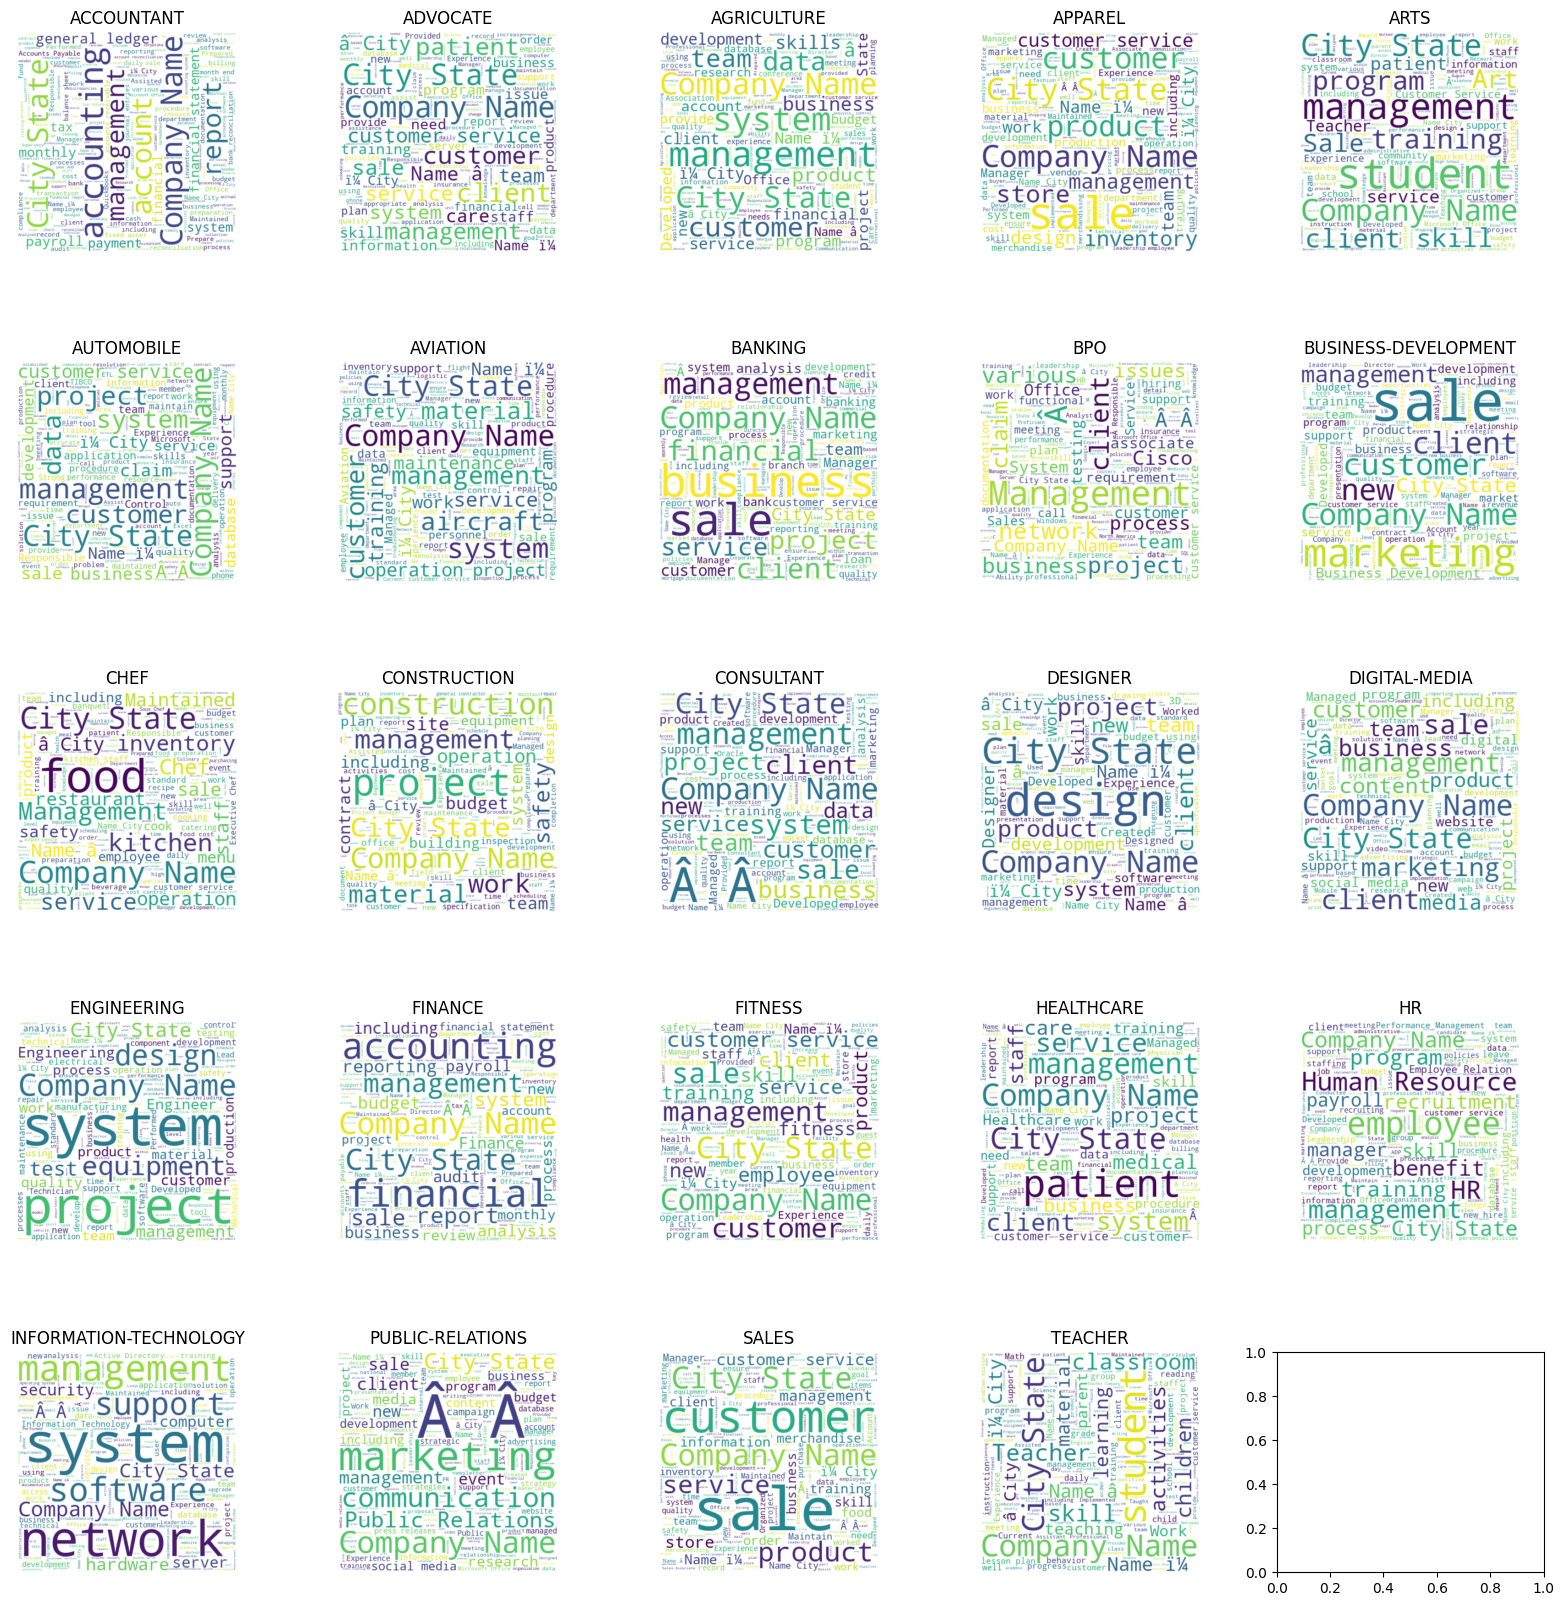

In [30]:
# this word cloud visualizes the grouping skills in category, which are most occuring

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame df with 'Categories' and 'Skills' columns
categories = resumes['Category'].unique()

# Create subplots for word clouds
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

for i, category in enumerate(categories):
    # Filter the DataFrame for the current category
    category_df = resumes[resumes['Category'] == category]

    # Concatenate all 'Skills' text for the current category
    all_skills_text = ' '.join(category_df['Skills'].astype(str))

    # Create a word cloud for the current category
    wc = WordCloud(width=400, height=400,
                   background_color='white').generate(all_skills_text)

    # Add the word cloud to the subplot
    row = i // 5
    col = i % 5
    axs[row, col].imshow(wc, interpolation='bilinear')
    axs[row, col].set_title(category)
    axs[row, col].axis('off')

# Show the subplots
plt.show()


In [31]:
# As When we are grouping the skills under category , we can see that there are the most occuring words like City,Company,Name
#  As I plan to use the "Skills" column for tasks like cosine similarity calculations, removing non-skill-related keywords can help improve the relevance of my results.


In [32]:
import re


def remove_words_from_skills(text):
    # Define a list of words to remove
    words_to_remove = ["city", "City", "company", "Company", "state", "State"]

    # Create a regular expression pattern to match these words (case-insensitive)
    pattern = r'\b(?:' + '|'.join(re.escape(word)
                                  for word in words_to_remove) + r')\b'

    # Use re.sub() to replace these words with an empty string
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    return cleaned_text


resumes["Skills"] = resumes["Skills"].apply(remove_words_from_skills)


# Now visualizing the word cloud for cleaned skills

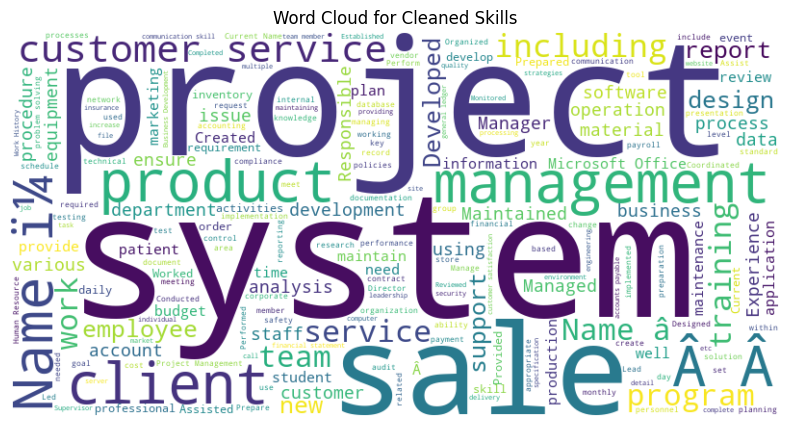

In [33]:

# combining the text from all rows into a single string
text = " ".join(resumes["Skills"])

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cleaned Skills")
plt.show()

# As we can see that the there no keywords related to keywords


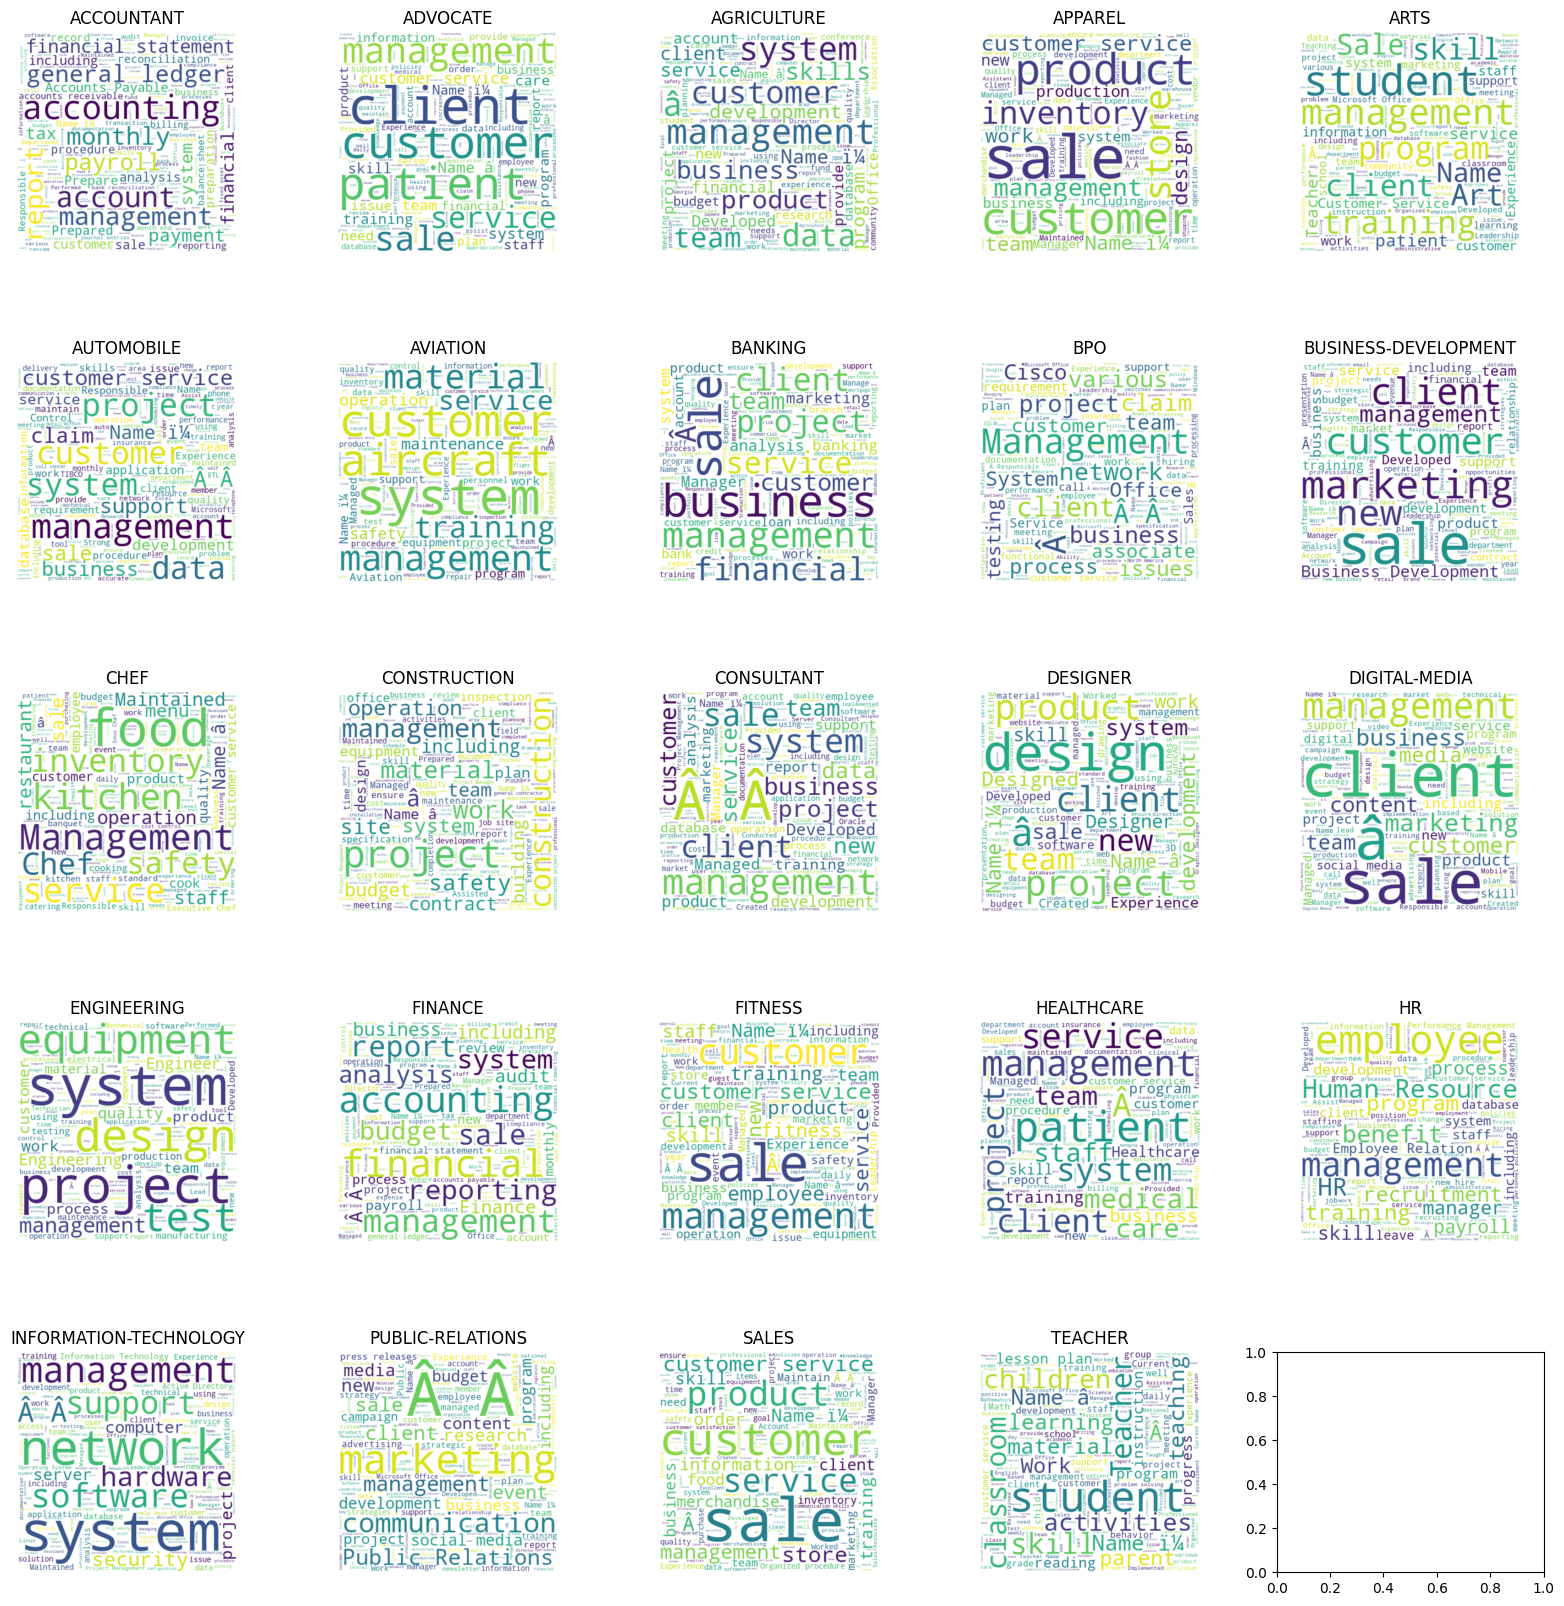

In [34]:
# As for better visualization my re captured some unnecesssary info in skills so i have removed them and visualized it
# this word cloud visualizes the grouping skills in category, which are most occuring

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming a DataFrame df with 'Categories' and 'Skills' columns
categories = resumes['Category'].unique()

# creating subplots for word clouds
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

for i, category in enumerate(categories):
    # filter the DataFrame for the current category
    category_df = resumes[resumes['Category'] == category]

    # concatenating all 'Skills' text for the current category
    all_skills_text = ' '.join(category_df['Skills'].astype(str))

    # Creating a word cloud for the current category
    wc = WordCloud(width=400, height=400,
                   background_color='white').generate(all_skills_text)


    row = i // 5
    col = i % 5
    axs[row, col].imshow(wc, interpolation='bilinear')
    axs[row, col].set_title(category)
    axs[row, col].axis('off')

# Showing the subplots
plt.show()


In [35]:
resumes

ID                                         resume_str  \
0     10554236  ACCOUNTANT\nSummary\nFinancial Accountant spec...   
1     10674770  STAFF ACCOUNTANT\nSummary\nHighly analytical a...   
2     11163645  ACCOUNTANT\nProfessional Summary\nTo obtain a ...   
3     11759079  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...   
4     12065211  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...   
...        ...                                                ...   
2479  86322251  READING TEACHER\nSummary\nI am a highly motiva...   
2480  86597425  HISTORY TEACHER\nProfessional Summary\nTo be e...   
2481  90363254  TEACHER\nSummary\nHighly ethical, dependable, ...   
2482  96547039  TEACHER\nSummary\nTalented early education pro...   
2483  99244405  Kpandipou Koffi\nSummary\nCompassionate teachi...   

                                                 Skills  \
0     Accounting; General Accounting; Accounts Payab...   
1     accounting, accounts payable, Accounts Receiva...   
2     accounts payables, accounts receivables, Accou...   
3     accounting, balance sheet, budgets, client, cl...   
4     Aderant/CMS\nExcel\nQuickBooks Pro\nSQL\nAcces...   
...                                                 ...   
2479  Highly Effective TeacherÂ \nMotivator\nInnovat...   
2480  [Number]\n \nWPM typing speed\nProfessional ph...   
2481  conflict resolution, course development, criti...   
2482  CPR, Creative thinking, delivery, First Aid, p...   
2483  Superb communication both verbal and written.\...   

                                              Education    Category  
0     Northern Maine Community College\n \n1994\n \n...  ACCOUNTANT  
1     Bachelor of Science\n \n: \nAccounting\n \n, \...  ACCOUNTANT  
2     Computer Applications Specialist Certificate P...  ACCOUNTANT  
3     EMORY UNIVERSITY, Goizueta Business School\n \...  ACCOUNTANT  
4     Bachelor of Business Administration\n \n: \nAc...  ACCOUNTANT  
...                                                 ...         ...  
2479  University of South Florida\n \n2002\n \nBache...     TEACHER  
2480  Bachelor of Science\n \n: \nInterdisciplinary ...     TEACHER  
2481  University of Phoenix,\n \n2007\n \nMaster of ...     TEACHER  
2482  Conflict resolution techniques\nTraining in fo...     TEACHER  
2483  and Training\nMBA\n \n: \nMarketing\n \nIGloba...     TEACHER  

[2479 rows x 5 columns]

# Visualizing the the most popular degrees

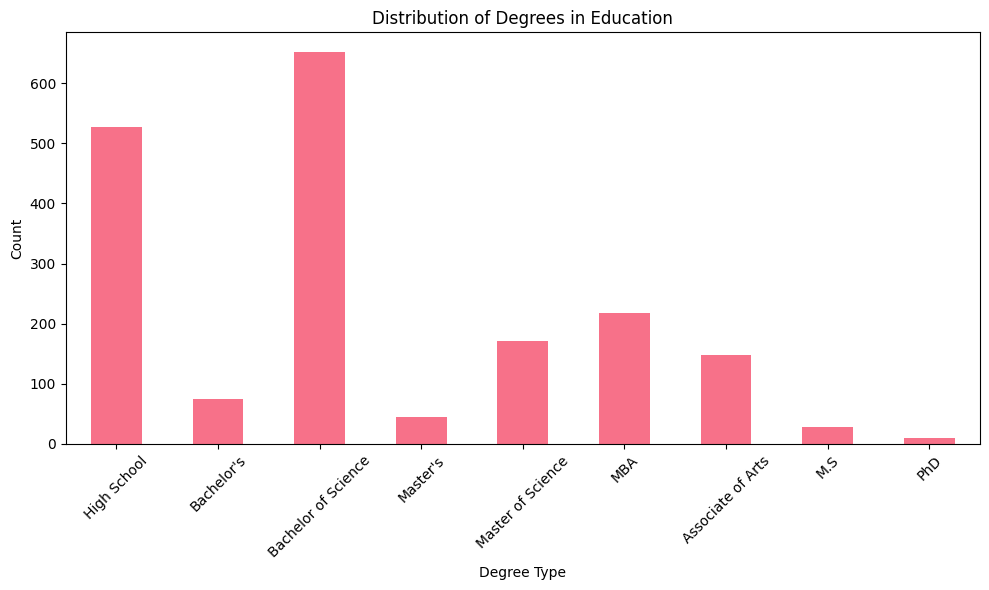

In [36]:
import seaborn as sns # using seaborn for better color palettes

# These are the most popular degrees that people used to do thats why i have include them
# Degrees to search for
degrees_need_to_search = ["High School", "Bachelor's", "Bachelor of Science",
                          "Master's", "Master of Science", "MBA", "Associate of Arts", "M.S", "PhD"]

degree_counts = {degree: 0 for degree in degrees_need_to_search}

# iterating through each row in the "Education" column and counting the degrees
for education_entry in resumes["Education"]:
    for degree in degrees_need_to_search:
        if degree.lower() in education_entry.lower():
            degree_counts[degree] += 1

# Converting the degree counts to a DataFrame for visualization
degree_df = pd.DataFrame.from_dict(
    degree_counts, orient='index', columns=["Count"])

# Choose a colorful palette for the bar chart
colors = sns.color_palette("husl", len(degree_df))

# Creating a bar chart to visualize the degree distribution
ax = degree_df.plot(kind='bar', figsize=(10, 6), legend=False, color=colors)
plt.xlabel("Degree Type")
plt.ylabel("Count")
plt.title("Distribution of Degrees in Education")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


In [38]:
resumes

ID                                         resume_str  \
0     10554236  ACCOUNTANT\nSummary\nFinancial Accountant spec...   
1     10674770  STAFF ACCOUNTANT\nSummary\nHighly analytical a...   
2     11163645  ACCOUNTANT\nProfessional Summary\nTo obtain a ...   
3     11759079  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...   
4     12065211  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...   
...        ...                                                ...   
2479  86322251  READING TEACHER\nSummary\nI am a highly motiva...   
2480  86597425  HISTORY TEACHER\nProfessional Summary\nTo be e...   
2481  90363254  TEACHER\nSummary\nHighly ethical, dependable, ...   
2482  96547039  TEACHER\nSummary\nTalented early education pro...   
2483  99244405  Kpandipou Koffi\nSummary\nCompassionate teachi...   

                                                 Skills  \
0     Accounting; General Accounting; Accounts Payab...   
1     accounting, accounts payable, Accounts Receiva...   
2     accounts payables, accounts receivables, Accou...   
3     accounting, balance sheet, budgets, client, cl...   
4     Aderant/CMS\nExcel\nQuickBooks Pro\nSQL\nAcces...   
...                                                 ...   
2479  Highly Effective TeacherÂ \nMotivator\nInnovat...   
2480  [Number]\n \nWPM typing speed\nProfessional ph...   
2481  conflict resolution, course development, criti...   
2482  CPR, Creative thinking, delivery, First Aid, p...   
2483  Superb communication both verbal and written.\...   

                                              Education    Category  
0     Northern Maine Community College\n \n1994\n \n...  ACCOUNTANT  
1     Bachelor of Science\n \n: \nAccounting\n \n, \...  ACCOUNTANT  
2     Computer Applications Specialist Certificate P...  ACCOUNTANT  
3     EMORY UNIVERSITY, Goizueta Business School\n \...  ACCOUNTANT  
4     Bachelor of Business Administration\n \n: \nAc...  ACCOUNTANT  
...                                                 ...         ...  
2479  University of South Florida\n \n2002\n \nBache...     TEACHER  
2480  Bachelor of Science\n \n: \nInterdisciplinary ...     TEACHER  
2481  University of Phoenix,\n \n2007\n \nMaster of ...     TEACHER  
2482  Conflict resolution techniques\nTraining in fo...     TEACHER  
2483  and Training\nMBA\n \n: \nMarketing\n \nIGloba...     TEACHER  

[2479 rows x 5 columns]

d:\MyProjects\resume_recommendation\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\MyProjects\resume_recommendation\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


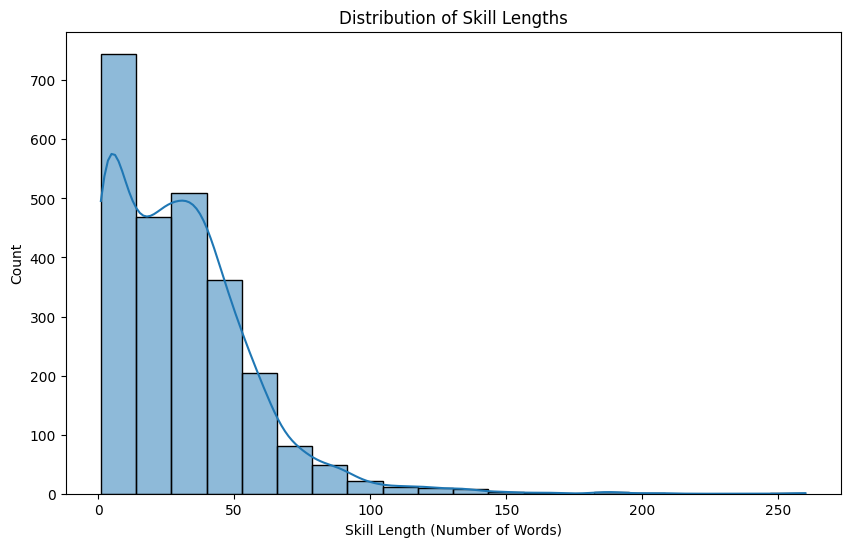

In [39]:
# Calculate the length of each skill entry and add it to a new column
resumes['Skill_Length'] = resumes['Skills'].apply(lambda x: len(x.split(',')))

# Visualize the skill length distribution
plt.figure(figsize=(10, 6))
sns.histplot(resumes['Skill_Length'], bins=20, kde=True)
plt.xlabel("Skill Length (Number of Words)")
plt.ylabel("Count")
plt.title("Distribution of Skill Lengths")
plt.show()


# 3.Text preprocessing
    1.Text Cleaning
    2.Text Preprocessing
        Tokenization
        Stop word Removal
        Stemming
        convert text to lowercase
    3.Normalization
    


In [40]:
# 1.Text cleaning
import re
import html

def clean_text(text):
    
    # remove the html tags
    text = re.sub('<.*?>', '', text)
    # Remove https
    text = re.sub('http\S+\s',' ',text)
    
    # removing @gmails
    text = re.sub('@\S+',' ',text)

    # Handle contractions (e.g., can't -> cannot)
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'s": " is",
        "'ll": " will",
        "'d": " would",
        "'m": " am",
        "'ve": " have"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove the special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # convert text to lower case
    text = text.lower()

   
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text


resumes['Skills'] = resumes['Skills'].apply(clean_text)
resumes['Education'] = resumes['Education'].apply(clean_text)
resumes['resume_str'] = resumes['resume_str'].apply(clean_text)









In [41]:
resumes.drop(['Skill_Length'], axis=1, inplace=True)


In [42]:
resumes

ID                                         resume_str  \
0     10554236  accountant summary financial accountant specia...   
1     10674770  staff accountant summary highly analytical and...   
2     11163645  accountant professional summary to obtain a po...   
3     11759079  senior accountant experience company name june...   
4     12065211  senior accountant professional summary senior ...   
...        ...                                                ...   
2479  86322251  reading teacher summary i am a highly motivate...   
2480  86597425  history teacher professional summary to be emp...   
2481  90363254  teacher summary highly ethical dependable and ...   
2482  96547039  teacher summary talented early education profe...   
2483  99244405  kpandipou koffi summary compassionate teaching...   

                                                 Skills  \
0     accounting general accounting accounts payable...   
1     accounting accounts payable accounts receivabl...   
2     accounts payables accounts receivables account...   
3     accounting balance sheet budgets client client...   
4     aderantcms excel quickbooks pro sql access pea...   
...                                                 ...   
2479  highly effective teacher motivator innovator s...   
2480  number wpm typing speed professional phone eti...   
2481  conflict resolution course development critica...   
2482  cpr creative thinking delivery first aid polic...   
2483  superb communication both verbal and written r...   

                                              Education    Category  
0     northern maine community college 1994 associat...  ACCOUNTANT  
1     bachelor of science accounting may 2010 univer...  ACCOUNTANT  
2     computer applications specialist certificate p...  ACCOUNTANT  
3     emory university goizueta business school 5 20...  ACCOUNTANT  
4     bachelor of business administration accounting...  ACCOUNTANT  
...                                                 ...         ...  
2479  university of south florida 2002 bachelor of s...     TEACHER  
2480  bachelor of science interdisciplinary studiesb...     TEACHER  
2481  university of phoenix 2007 master of arts educ...     TEACHER  
2482  conflict resolution techniques training in foo...     TEACHER  
2483  and training mba marketing iglobal university ...     TEACHER  

[2479 rows x 5 columns]

In [43]:
resumes_1 = resumes.copy()

In [44]:
# 2. Text Preprocessing ->necesaary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string



In [45]:
# Text preprocessing
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Normalization (convert to lowercase)
    normalized_words = [word.lower() for word in stemmed_words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(normalized_words)

    return cleaned_text


resumes['Skills'] = resumes['Skills'].apply(preprocess_text)
resumes['Education'] = resumes['Education'].apply(preprocess_text)
resumes['resume_str'] = resumes['resume_str'].apply(preprocess_text)


In [48]:
resumes

ID                                         resume_str  \
0     10554236  account summari financi account special financ...   
1     10674770  staff account summari highli analyt detailori ...   
2     11163645  account profession summari obtain posit fastpa...   
3     11759079  senior account experi compani name june 2011 c...   
4     12065211  senior account profession summari senior accou...   
...        ...                                                ...   
2479  86322251  read teacher summari highli motiv educ selfsta...   
2480  86597425  histori teacher profession summari employ admi...   
2481  90363254  teacher summari highli ethic depend dilig expe...   
2482  96547039  teacher summari talent earli educ profession d...   
2483  99244405  kpandip koffi summari compassion teach profess...   

                                                 Skills  \
0     account gener account account payabl program m...   
1     account account payabl account receiv adp adve...   
2     account payabl account receiv account payabl a...   
3     account balanc sheet budget client client deri...   
4     aderantcm excel quickbook pro sql access peach...   
...                                                 ...   
2479  highli effect teacher motiv innov success lead...   
2480  number wpm type speed profession phone etiquet...   
2481  conflict resolut cours develop critic think cu...   
2482  cpr creativ think deliveri first aid polici pr...   
2483  superb commun verbal written reliabl self suff...   

                                              Education    Category  
0     northern main commun colleg 1994 associ accoun...  ACCOUNTANT  
1     bachelor scienc account may 2010 univers north...  ACCOUNTANT  
2     comput applic specialist certif program 2008 m...  ACCOUNTANT  
3     emori univers goizueta busi school 5 2007 bach...  ACCOUNTANT  
4     bachelor busi administr account august 2002 te...  ACCOUNTANT  
...                                                 ...         ...  
2479  univers south florida 2002 bachelor scienc var...     TEACHER  
2480  bachelor scienc interdisciplinari studiesbusi ...     TEACHER  
2481  univers phoenix 2007 master art educationcurri...     TEACHER  
2482  conflict resolut techniqu train food handl pre...     TEACHER  
2483  train mba market iglob univers jun 2015 citi s...     TEACHER  

[2479 rows x 5 columns]

In [44]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('corpus')


[nltk_data] Downloading package stopwords to C:\Users\ANAND
[nltk_data]     PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ANAND
[nltk_data]     PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [49]:
resumes

ID                                         resume_str  \
0     10554236  account summari financi account special financ...   
1     10674770  staff account summari highli analyt detailori ...   
2     11163645  account profession summari obtain posit fastpa...   
3     11759079  senior account experi compani name june 2011 c...   
4     12065211  senior account profession summari senior accou...   
...        ...                                                ...   
2479  86322251  read teacher summari highli motiv educ selfsta...   
2480  86597425  histori teacher profession summari employ admi...   
2481  90363254  teacher summari highli ethic depend dilig expe...   
2482  96547039  teacher summari talent earli educ profession d...   
2483  99244405  kpandip koffi summari compassion teach profess...   

                                                 Skills  \
0     account gener account account payabl program m...   
1     account account payabl account receiv adp adve...   
2     account payabl account receiv account payabl a...   
3     account balanc sheet budget client client deri...   
4     aderantcm excel quickbook pro sql access peach...   
...                                                 ...   
2479  highli effect teacher motiv innov success lead...   
2480  number wpm type speed profession phone etiquet...   
2481  conflict resolut cours develop critic think cu...   
2482  cpr creativ think deliveri first aid polici pr...   
2483  superb commun verbal written reliabl self suff...   

                                              Education    Category  
0     northern main commun colleg 1994 associ accoun...  ACCOUNTANT  
1     bachelor scienc account may 2010 univers north...  ACCOUNTANT  
2     comput applic specialist certif program 2008 m...  ACCOUNTANT  
3     emori univers goizueta busi school 5 2007 bach...  ACCOUNTANT  
4     bachelor busi administr account august 2002 te...  ACCOUNTANT  
...                                                 ...         ...  
2479  univers south florida 2002 bachelor scienc var...     TEACHER  
2480  bachelor scienc interdisciplinari studiesbusi ...     TEACHER  
2481  univers phoenix 2007 master art educationcurri...     TEACHER  
2482  conflict resolut techniqu train food handl pre...     TEACHER  
2483  train mba market iglob univers jun 2015 citi s...     TEACHER  

[2479 rows x 5 columns]

In [159]:
# Normalization
# this type of normalization is not needed because no one will do this, who is applying for the job .They will not include or use short notations 

import re


def normalize_text(text):
    # Define a dictionary for common replacements
    replacements = {
        r"\bu\b": "you",
        r"\br\b": "are",
        r"\bgr8\b": "great",
        r"\b2\b": "to",
        r"\b4\b": "for",
        r"\bb/c\b": "because",
        r"\bw/ \b": "with"
    }

    # Replace known patterns using the dictionary
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)


    return text


# Ex:Usage
original_text = "you are gr8, b/c you know 2 code. w/ Python!"
normalized_text = normalize_text(original_text)
print(normalized_text)


you are great, because you know to code. withPython!


In [160]:
import re
# not needed

def handle_special_tokens(text):
    # Define regular expressions to match numeric and special tokens
    number_pattern = r'\b\d+\b'  # Match standalone numbers
    # Match date patterns (e.g., 12/31/2023)
    date_pattern = r'\d{1,2}/\d{1,2}/\d{4}'
    # Match email addresses
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
    # Match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

    # Replace numeric and special tokens with placeholders
    text = re.sub(number_pattern, 'NUM', text)
    text = re.sub(date_pattern, 'DATE', text)
    text = re.sub(email_pattern, 'EMAIL', text)
    text = re.sub(url_pattern, 'URL', text)

    return text


# Example usage:
original_text = "My email is john.doe@example.com, and I visited https://www.example.com on 12/31/2023."
processed_text = handle_special_tokens(original_text)
print(processed_text)


My email is EMAIL, and I visited URL on NUM/NUM/NUM.


In [50]:
resumes

ID                                         resume_str  \
0     10554236  account summari financi account special financ...   
1     10674770  staff account summari highli analyt detailori ...   
2     11163645  account profession summari obtain posit fastpa...   
3     11759079  senior account experi compani name june 2011 c...   
4     12065211  senior account profession summari senior accou...   
...        ...                                                ...   
2479  86322251  read teacher summari highli motiv educ selfsta...   
2480  86597425  histori teacher profession summari employ admi...   
2481  90363254  teacher summari highli ethic depend dilig expe...   
2482  96547039  teacher summari talent earli educ profession d...   
2483  99244405  kpandip koffi summari compassion teach profess...   

                                                 Skills  \
0     account gener account account payabl program m...   
1     account account payabl account receiv adp adve...   
2     account payabl account receiv account payabl a...   
3     account balanc sheet budget client client deri...   
4     aderantcm excel quickbook pro sql access peach...   
...                                                 ...   
2479  highli effect teacher motiv innov success lead...   
2480  number wpm type speed profession phone etiquet...   
2481  conflict resolut cours develop critic think cu...   
2482  cpr creativ think deliveri first aid polici pr...   
2483  superb commun verbal written reliabl self suff...   

                                              Education    Category  
0     northern main commun colleg 1994 associ accoun...  ACCOUNTANT  
1     bachelor scienc account may 2010 univers north...  ACCOUNTANT  
2     comput applic specialist certif program 2008 m...  ACCOUNTANT  
3     emori univers goizueta busi school 5 2007 bach...  ACCOUNTANT  
4     bachelor busi administr account august 2002 te...  ACCOUNTANT  
...                                                 ...         ...  
2479  univers south florida 2002 bachelor scienc var...     TEACHER  
2480  bachelor scienc interdisciplinari studiesbusi ...     TEACHER  
2481  univers phoenix 2007 master art educationcurri...     TEACHER  
2482  conflict resolut techniqu train food handl pre...     TEACHER  
2483  train mba market iglob univers jun 2015 citi s...     TEACHER  

[2479 rows x 5 columns]

In [51]:
resumes

ID                                         resume_str  \
0     10554236  account summari financi account special financ...   
1     10674770  staff account summari highli analyt detailori ...   
2     11163645  account profession summari obtain posit fastpa...   
3     11759079  senior account experi compani name june 2011 c...   
4     12065211  senior account profession summari senior accou...   
...        ...                                                ...   
2479  86322251  read teacher summari highli motiv educ selfsta...   
2480  86597425  histori teacher profession summari employ admi...   
2481  90363254  teacher summari highli ethic depend dilig expe...   
2482  96547039  teacher summari talent earli educ profession d...   
2483  99244405  kpandip koffi summari compassion teach profess...   

                                                 Skills  \
0     account gener account account payabl program m...   
1     account account payabl account receiv adp adve...   
2     account payabl account receiv account payabl a...   
3     account balanc sheet budget client client deri...   
4     aderantcm excel quickbook pro sql access peach...   
...                                                 ...   
2479  highli effect teacher motiv innov success lead...   
2480  number wpm type speed profession phone etiquet...   
2481  conflict resolut cours develop critic think cu...   
2482  cpr creativ think deliveri first aid polici pr...   
2483  superb commun verbal written reliabl self suff...   

                                              Education    Category  
0     northern main commun colleg 1994 associ accoun...  ACCOUNTANT  
1     bachelor scienc account may 2010 univers north...  ACCOUNTANT  
2     comput applic specialist certif program 2008 m...  ACCOUNTANT  
3     emori univers goizueta busi school 5 2007 bach...  ACCOUNTANT  
4     bachelor busi administr account august 2002 te...  ACCOUNTANT  
...                                                 ...         ...  
2479  univers south florida 2002 bachelor scienc var...     TEACHER  
2480  bachelor scienc interdisciplinari studiesbusi ...     TEACHER  
2481  univers phoenix 2007 master art educationcurri...     TEACHER  
2482  conflict resolut techniqu train food handl pre...     TEACHER  
2483  train mba market iglob univers jun 2015 citi s...     TEACHER  

[2479 rows x 5 columns]

In [52]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import pandas as pd

# Load the pretrained DistilBERT tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

# I have a DataFrame named 'resumes' with the features 'resume_str', 'Skills', 'Education', and 'Category'


# Defining a function to convert text to embeddings


def text_to_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt',
                       padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**tokens)

    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    return embeddings


# Apply the function to your 'resume_str' column and create a new column for embeddings
resume_embeddings = pd.DataFrame()
resume_embeddings['resume_embeddings'] = resumes['resume_str'].apply(text_to_embeddings)
resume_embeddings['Skills_embeddings'] = resumes['Skills'].apply(
    text_to_embeddings)
resume_embeddings['Education_embeddings'] = resumes['Education'].apply(
    text_to_embeddings)
resume_embeddings['Category_embeddings'] = resumes['Category'].apply(
    text_to_embeddings)

# 'resume_embeddings' column will contain the embeddings for each resume
# You can save this DataFrame or use it for further analysis


In [53]:
resume_embeddings

resume_embeddings  \
0     [-0.26003867, 0.012976939, 0.4165457, -0.15238...   
1     [-0.06641579, 0.11238586, 0.5235423, -0.212445...   
2     [-0.14731643, 0.11049318, 0.4971406, -0.165660...   
3     [-0.20380613, 0.043528393, 0.45422453, -0.1807...   
4     [-0.23526546, 0.08333717, 0.4867211, -0.144641...   
...                                                 ...   
2479  [-0.1377847, 0.102659866, 0.4627053, -0.144470...   
2480  [-0.15868145, 0.15059218, 0.4466273, -0.154119...   
2481  [-0.123068444, 0.1372141, 0.33384886, -0.05790...   
2482  [-0.24849397, 0.14208049, 0.39496052, -0.13106...   
2483  [-0.3002756, 0.10735148, 0.3537687, -0.1635201...   

                                      Skills_embeddings  \
0     [0.02330272, -0.19073415, 0.11662723, 0.046888...   
1     [-0.053273477, -0.03186472, 0.3339305, -0.1126...   
2     [-0.013502604, -0.09927711, 0.36465463, -0.009...   
3     [-0.0674149, -0.022422701, 0.41342857, -0.0704...   
4     [-0.25788456, 0.0751429, 0.47004527, -0.149368...   
...                                                 ...   
2479  [-0.16119665, -0.04284826, 0.16843861, 0.15981...   
2480  [-0.18410213, 0.14933369, 0.4346786, -0.145923...   
2481  [-0.059177596, 0.09357593, -0.031016154, 0.119...   
2482  [0.029167552, -0.1018525, 0.14174715, 0.065157...   
2483  [-0.20824833, 0.007023043, 0.37765536, -0.1364...   

                                   Education_embeddings  \
0     [-0.09957024, 0.13848259, 0.35226062, -0.14314...   
1     [-0.054587007, 0.121881016, 0.5176294, -0.1967...   
2     [-0.2303213, -0.036404643, 0.27433866, 0.35076...   
3     [-0.032910466, 0.07959033, 0.234414, -0.020047...   
4     [0.0141591905, 0.030560711, 0.40228197, -0.000...   
...                                                 ...   
2479  [-0.18351856, -0.030530801, 0.30122104, 0.0393...   
2480  [-0.10174998, 0.066632845, 0.28711188, -0.0044...   
2481  [-0.06384209, 0.14172627, 0.25858527, 0.115813...   
2482  [-0.24213813, 0.12914857, 0.40388262, -0.08845...   
2483  [-0.25297213, -0.015324917, 0.43184376, 0.0747...   

                                    Category_embeddings  
0     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
1     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
2     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
3     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
4     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
...                                                 ...  
2479  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2480  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2481  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2482  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2483  [0.40989456, 0.058794007, -0.16927497, -0.0124...  

[2479 rows x 4 columns]

In [54]:
resume_embeddings['resume_embeddings'][0]

array([-2.60038674e-01,  1.29769389e-02,  4.16545689e-01, -1.52380735e-01,
        2.96056181e-01,  1.00263916e-02,  1.24822140e-01,  6.77525550e-02,
       -1.81820244e-04, -3.91943306e-02, -9.52607617e-02, -1.35152444e-01,
       -7.62914494e-02,  1.73781455e-01, -2.14643449e-01,  4.10726607e-01,
        8.87923241e-02, -1.02286108e-01,  7.71339014e-02,  3.18761617e-01,
        5.80431998e-01, -1.19610960e-02,  3.74728329e-02,  4.45304930e-01,
        2.62172401e-01,  8.21700916e-02,  1.20394796e-01, -7.88151100e-02,
       -1.12651139e-01,  3.23568471e-02,  1.31775007e-01,  3.08596678e-02,
       -1.54684424e-01, -3.62649560e-01,  4.66608703e-02, -5.60179129e-02,
        9.93852168e-02,  2.43067257e-02, -3.93746793e-02,  2.07992435e-01,
       -4.26921725e-01, -5.94291031e-01,  2.79328637e-02,  1.24530345e-01,
       -5.07678762e-02, -3.86487842e-01, -8.33726674e-03,  2.79192589e-02,
       -1.59798488e-01, -1.21488102e-01, -5.45979142e-01,  3.16400081e-01,
       -3.57827336e-01, -

In [55]:
resume_embeddings['resume_embeddings']


0       [-0.26003867, 0.012976939, 0.4165457, -0.15238...
1       [-0.06641579, 0.11238586, 0.5235423, -0.212445...
2       [-0.14731643, 0.11049318, 0.4971406, -0.165660...
3       [-0.20380613, 0.043528393, 0.45422453, -0.1807...
4       [-0.23526546, 0.08333717, 0.4867211, -0.144641...
                              ...                        
2479    [-0.1377847, 0.102659866, 0.4627053, -0.144470...
2480    [-0.15868145, 0.15059218, 0.4466273, -0.154119...
2481    [-0.123068444, 0.1372141, 0.33384886, -0.05790...
2482    [-0.24849397, 0.14208049, 0.39496052, -0.13106...
2483    [-0.3002756, 0.10735148, 0.3537687, -0.1635201...
Name: resume_embeddings, Length: 2479, dtype: object

In [56]:
from datasets import load_dataset

# load the dataset
dataset = load_dataset("jacob-hugging-face/job-descriptions")

# Access a specific split of the dataset (e.g., 'train')
jd_dataset = dataset['train']


In [57]:
jd_dataset

Dataset({
    features: ['company_name', 'job_description', 'position_title', 'description_length', 'model_response'],
    num_rows: 853
})

In [58]:
jd_dataset = pd.DataFrame(jd_dataset)


In [59]:
jd_dataset

company_name                                    job_description  \
0                  Google  minimum qualifications\nbachelors degree or eq...   
1                   Apple  description\nas an asc you will be highly infl...   
2                 Netflix  its an amazing time to be joining netflix as w...   
3             Robert Half  description\n\nweb designers looking to expand...   
4               TrackFive  at trackfive weve got big goals were on a miss...   
..                    ...                                                ...   
848               Menards  job description\n\nparttime\n\nmake big money ...   
849                Parker  responsibilities\nparkers internship program w...   
850        Borgen Project   the borgen project is an innovative national ...   
851  Wyndham Destinations  put the world on vacation\n\nat wyndham destin...   
852               Aerotek  this job handles customer inquiries by telepho...   

                                        position_title  description_length  \
0                                     Sales Specialist                2727   
1                           Apple Solutions Consultant                 828   
2            Licensing Coordinator - Consumer Products                3205   
3                                         Web Designer                2489   
4                                        Web Developer                3167   
..                                                 ...                 ...   
848                              Management Internship                1122   
849  Human Resources Internship - Corporate  (Year-...                3840   
850                     Writer / Journalist Internship                 897   
851          Inbound Customer Service / Sales (Remote)                4604   
852     Remote Inbound Customer Service Representative                1592   

                                        model_response  
0     {\n  "Core Responsibilities": "Responsible fo...  
1     {\n  "Core Responsibilities": "as an asc you ...  
2     {\n  "Core Responsibilities": "Help drive bus...  
3     {\n  "Core Responsibilities": "Designing webs...  
4     {\n  "Core Responsibilities": "Build and layo...  
..                                                 ...  
848   {\n  "Core Responsibilities": "Responsibiliti...  
849   {\n  "Core Responsibilities": "Assist in gene...  
850   {\n  "Core Responsibilities": "Write one arti...  
851   {\n  "Core Responsibilities": "Answer inbound...  
852   {\n  "Core Responsibilities": "Handle incomin...  

[853 rows x 5 columns]

In [60]:
job_desc = pd.DataFrame()
job_desc['job_description'] = jd_dataset['job_description']
job_desc['company_name'] = jd_dataset['company_name']


In [61]:
job_desc.iloc[1]['job_description']


'description\nas an asc you will be highly influential in growing mind and market share of apple products while building longterm relationships with those who share your passion \ncustomer experiences are driven through you and your partner team growing in an ever changing and challenging environment you strive for perfection whether its maintaining visual merchandising or helping to grow and develop your partner team\n\nqualifications\na passion to help people understand how apple products can enrich their livesexcellent communication skills allowing you to be as comfortable in front of a small group as you are speaking with individuals years preferred working in a dynamic sales andor results driven environment as well as proven success developing customer loyaltyability to encourage a partner team and grow apple business'

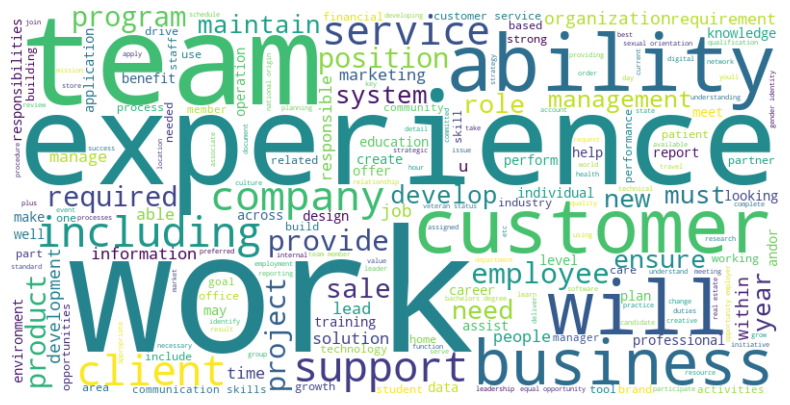

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(job_desc['job_description']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [63]:
# As we see the most occuring words is like company , experience etx so we need to match the jd's and resume

In [64]:
job_desc.isnull().sum()

job_description    0
company_name       0
dtype: int64

In [65]:
job_desc.duplicated().sum()

0

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
import torch
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
import numpy as np

# Load DistilBERT tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)


def clean_text(text):

    # remove the html tags
    text = re.sub('<.*?>', '', text)
    # Remove https
    text = re.sub('http\S+\s', ' ', text)

    # removing @gmails
    text = re.sub('@\S+', ' ', text)

    # Handle contractions (e.g., can't -> cannot)
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'s": " is",
        "'ll": " will",
        "'d": " would",
        "'m": " am",
        "'ve": " have"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove the special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # convert text to lower case
    text = text.lower()

    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text

# Text preprocessing


def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Normalization (convert to lowercase)
    normalized_words = [word.lower() for word in stemmed_words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(normalized_words)

    return cleaned_text


def text_to_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt',
                       padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**tokens)

    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    return embeddings


def recommend_resume(job_description, resume_embeddings,resumes_1):
    # clean and preprocess the text
    cleaned_text = clean_text(job_description)
    processed_text = preprocess_text(cleaned_text)

    # Tokenize the jd and extract word embeddings
    jd_embedding = text_to_embeddings(processed_text)
    jd_embedding_2d = jd_embedding.reshape(1, -1)
    resume_embeddings_flat = np.array(
        [emb.flatten() for emb in resume_embeddings['resume_embeddings'].values])
    # Calucate cosine similarity

    cosine_similarities = cosine_similarity(jd_embedding_2d, resume_embeddings_flat)

    sorted_indices = np.argsort(cosine_similarities[0])[::1]

    top_5_indices = sorted_indices[:5]
    top_5_similarities = cosine_similarities[0][top_5_indices]

    recommended_resumes = []

    for j, index in enumerate(top_5_indices):
        resume_id = resumes_1['ID'].iloc[index]
        similarity_score = top_5_similarities[j]
        original_resume = resumes_1['resume_str'].iloc[index]

        recommended_resumes.append({
            "Resume_ID": resume_id,
            "Cosine_Similarity": similarity_score,
            "Original_Resume": original_resume
        })

    return recommended_resumes

    


job_description = job_desc.iloc[0]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 12491898
Cosine Similarity: 0.8638802170753479
Original Resume:
work history company name construction laborer accomplishments puesto que solicita fecha almedagenoa constructors se ha comprometido a la igualdad de oportunidades para los solicitantes y empleados sin distincin de raza color sexo edad religin origen nacional discapacidad estado civil condicin de veterano orientacin sexual informacin gentica cualquier otra caracterstica protegida por la ley esta poltica se aplica a todos los trminos y condiciones de empleo incluyendo pero no limitado a contratacin capacitacin promociones disciplina traslados excedencias y la terminacin del empleo informe al departamento de recursos humanos de la empresa si necesita ayuda para completar esta solicitud de empleo por favor escriba o imprima complete cada seccin de esta solicitud y adjunte un curriculum vitae si usted tiene uno name nombresrsra nombre apellido direccion ciudad estado cdigo postal telfono de casa telfono de trabajo o

In [69]:
job_description = job_desc.iloc[200]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 12491898
Cosine Similarity: 0.8215110898017883
Original Resume:
work history company name construction laborer accomplishments puesto que solicita fecha almedagenoa constructors se ha comprometido a la igualdad de oportunidades para los solicitantes y empleados sin distincin de raza color sexo edad religin origen nacional discapacidad estado civil condicin de veterano orientacin sexual informacin gentica cualquier otra caracterstica protegida por la ley esta poltica se aplica a todos los trminos y condiciones de empleo incluyendo pero no limitado a contratacin capacitacin promociones disciplina traslados excedencias y la terminacin del empleo informe al departamento de recursos humanos de la empresa si necesita ayuda para completar esta solicitud de empleo por favor escriba o imprima complete cada seccin de esta solicitud y adjunte un curriculum vitae si usted tiene uno name nombresrsra nombre apellido direccion ciudad estado cdigo postal telfono de casa telfono de trabajo o

In [70]:
job_description = job_desc.iloc[100]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 12491898
Cosine Similarity: 0.8291603922843933
Original Resume:
work history company name construction laborer accomplishments puesto que solicita fecha almedagenoa constructors se ha comprometido a la igualdad de oportunidades para los solicitantes y empleados sin distincin de raza color sexo edad religin origen nacional discapacidad estado civil condicin de veterano orientacin sexual informacin gentica cualquier otra caracterstica protegida por la ley esta poltica se aplica a todos los trminos y condiciones de empleo incluyendo pero no limitado a contratacin capacitacin promociones disciplina traslados excedencias y la terminacin del empleo informe al departamento de recursos humanos de la empresa si necesita ayuda para completar esta solicitud de empleo por favor escriba o imprima complete cada seccin de esta solicitud y adjunte un curriculum vitae si usted tiene uno name nombresrsra nombre apellido direccion ciudad estado cdigo postal telfono de casa telfono de trabajo o

In [71]:
job_description = job_desc.iloc[300]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 27058381
Cosine Similarity: 0.7076008915901184
Original Resume:
system administrator experience 032009 company name 21674 sksit security and the wireless environment 110512 18640 sksit securing wlans 103012 27481 sksit building and securing voip networks 032012 36542 sksit protecting windows 7 against malware and vulnerabilities 031312 30688 sksit physical security 020312 14766 sksit firewalls and vpns 012312 34601 kisam service manager sm overview 092711 31699 adding of assets in kisam asset manager 092611 31856 windows server 2008 system administration 040111 28902 stan security configurations for windows 2003 servers 013111 28801 eops test planning procedures os databases and cots 012011 14763 sksit ans encryption technologies 040910 23796 sksit intrusion detection and response in networked environments 032210 21797 sksit introducing voice over ip 041509 21674 sksit security and the wireless environment 041409 17090 sksit wireless communication basics 041009 17623 sksit a

In [72]:
job_description = job_desc.iloc[800]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 21705160
Cosine Similarity: 0.8735265731811523
Original Resume:
graphic designer experience graphic designer january 2014 to january 2015 company name city state with a personal interest in design rowena served as one of the club officers from fall 2014 to spring 2015 as the graphic designer where she designs and creates event posters not only for the club itself but also other clubs on campus human resource manager intern january 2006 company name city state sales person january 2002 to january 2004 company name city state education 2010 holy innocents high school singapore singapore journalism 2015 de anza college city state journalism additional information profile rowena is a dedicated aspiring fashion journalist hoping to transfer from de anza college to rutgers university in fall 2016 skills graphic designer posters

Resume ID: 12491898
Cosine Similarity: 0.8832414150238037
Original Resume:
work history company name construction laborer accomplishments puesto que solic

In [73]:
job_description = job_desc.iloc[350]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 12491898
Cosine Similarity: 0.8289872407913208
Original Resume:
work history company name construction laborer accomplishments puesto que solicita fecha almedagenoa constructors se ha comprometido a la igualdad de oportunidades para los solicitantes y empleados sin distincin de raza color sexo edad religin origen nacional discapacidad estado civil condicin de veterano orientacin sexual informacin gentica cualquier otra caracterstica protegida por la ley esta poltica se aplica a todos los trminos y condiciones de empleo incluyendo pero no limitado a contratacin capacitacin promociones disciplina traslados excedencias y la terminacin del empleo informe al departamento de recursos humanos de la empresa si necesita ayuda para completar esta solicitud de empleo por favor escriba o imprima complete cada seccin de esta solicitud y adjunte un curriculum vitae si usted tiene uno name nombresrsra nombre apellido direccion ciudad estado cdigo postal telfono de casa telfono de trabajo o

In [74]:
job_description = job_desc.iloc[260]['job_description']
recommended_resumes = recommend_resume(
    job_description, resume_embeddings, resumes_1)
for resume in recommended_resumes:
    print(f"Resume ID: {resume['Resume_ID']}")
    print(f"Cosine Similarity: {resume['Cosine_Similarity']}")
    print(f"Original Resume:\n{resume['Original_Resume']}\n")


Resume ID: 12491898
Cosine Similarity: 0.8245635032653809
Original Resume:
work history company name construction laborer accomplishments puesto que solicita fecha almedagenoa constructors se ha comprometido a la igualdad de oportunidades para los solicitantes y empleados sin distincin de raza color sexo edad religin origen nacional discapacidad estado civil condicin de veterano orientacin sexual informacin gentica cualquier otra caracterstica protegida por la ley esta poltica se aplica a todos los trminos y condiciones de empleo incluyendo pero no limitado a contratacin capacitacin promociones disciplina traslados excedencias y la terminacin del empleo informe al departamento de recursos humanos de la empresa si necesita ayuda para completar esta solicitud de empleo por favor escriba o imprima complete cada seccin de esta solicitud y adjunte un curriculum vitae si usted tiene uno name nombresrsra nombre apellido direccion ciudad estado cdigo postal telfono de casa telfono de trabajo o

## Sucessfully created a function which takes job description and gives the top 5 recommended resumes

# saving the resume_embeddings in a pickle file

In [75]:
resume_embeddings

resume_embeddings  \
0     [-0.26003867, 0.012976939, 0.4165457, -0.15238...   
1     [-0.06641579, 0.11238586, 0.5235423, -0.212445...   
2     [-0.14731643, 0.11049318, 0.4971406, -0.165660...   
3     [-0.20380613, 0.043528393, 0.45422453, -0.1807...   
4     [-0.23526546, 0.08333717, 0.4867211, -0.144641...   
...                                                 ...   
2479  [-0.1377847, 0.102659866, 0.4627053, -0.144470...   
2480  [-0.15868145, 0.15059218, 0.4466273, -0.154119...   
2481  [-0.123068444, 0.1372141, 0.33384886, -0.05790...   
2482  [-0.24849397, 0.14208049, 0.39496052, -0.13106...   
2483  [-0.3002756, 0.10735148, 0.3537687, -0.1635201...   

                                      Skills_embeddings  \
0     [0.02330272, -0.19073415, 0.11662723, 0.046888...   
1     [-0.053273477, -0.03186472, 0.3339305, -0.1126...   
2     [-0.013502604, -0.09927711, 0.36465463, -0.009...   
3     [-0.0674149, -0.022422701, 0.41342857, -0.0704...   
4     [-0.25788456, 0.0751429, 0.47004527, -0.149368...   
...                                                 ...   
2479  [-0.16119665, -0.04284826, 0.16843861, 0.15981...   
2480  [-0.18410213, 0.14933369, 0.4346786, -0.145923...   
2481  [-0.059177596, 0.09357593, -0.031016154, 0.119...   
2482  [0.029167552, -0.1018525, 0.14174715, 0.065157...   
2483  [-0.20824833, 0.007023043, 0.37765536, -0.1364...   

                                   Education_embeddings  \
0     [-0.09957024, 0.13848259, 0.35226062, -0.14314...   
1     [-0.054587007, 0.121881016, 0.5176294, -0.1967...   
2     [-0.2303213, -0.036404643, 0.27433866, 0.35076...   
3     [-0.032910466, 0.07959033, 0.234414, -0.020047...   
4     [0.0141591905, 0.030560711, 0.40228197, -0.000...   
...                                                 ...   
2479  [-0.18351856, -0.030530801, 0.30122104, 0.0393...   
2480  [-0.10174998, 0.066632845, 0.28711188, -0.0044...   
2481  [-0.06384209, 0.14172627, 0.25858527, 0.115813...   
2482  [-0.24213813, 0.12914857, 0.40388262, -0.08845...   
2483  [-0.25297213, -0.015324917, 0.43184376, 0.0747...   

                                    Category_embeddings  
0     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
1     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
2     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
3     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
4     [0.40846467, 0.173756, -0.16465156, 0.10810429...  
...                                                 ...  
2479  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2480  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2481  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2482  [0.40989456, 0.058794007, -0.16927497, -0.0124...  
2483  [0.40989456, 0.058794007, -0.16927497, -0.0124...  

[2479 rows x 4 columns]

In [76]:
import pandas as pd
import pickle

# I have a DataFrame called 'resume_embedding' with a column 'resume_embeddings'

# Define the file path for the pickle file
pickle_file_path = 'resume_embeddings.pkl'

# Save the DataFrame to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(resume_embeddings, file)

print(f'Resume embeddings saved to {pickle_file_path}')


Resume embeddings saved to resume_embeddings.pkl


In [78]:
csv_file_path = 'resumes_ex.csv'

# Save the DataFrame to a CSV file
resumes_1.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to {csv_file_path}')


DataFrame saved to resumes_ex.csv
